# irisデータセットを機械学習で分類する
### 複数のモデルを同時に学習して可視化で比較をする仮想DataRobot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

RANDOM_SEED=71

# データの前処理

In [2]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

# print(iris.feature_names)
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# petal length, petal widthを使う
X = iris.data[:, [2,3]]

#X = iris.data[:] #上手くいかなかったので直したい
y = iris.target

# トレーニングデータとテストデータに分割。
# 今回は訓練データを70%、テストデータは30%としている。
# 乱数を制御するパラメータ random_state は None にすると毎回異なるデータを生成する
# 層化抽出法：母集団の比率を維持してサンプリングする(stratifyオプション)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# モデルの学習

In [5]:
from sklearn import clone
models=[]

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# 線形SVMのインスタンスを生成
models.append(LinearSVC(random_state=RANDOM_SEED)) # 
models.append(SVC(kernel='linear', random_state=RANDOM_SEED)) # 線形カーネル
models.append(SVC(kernel='poly', degree=3, random_state=RANDOM_SEED)) # 多項式カーネル
models.append(SVC(kernel='rbf', gamma=0.7, random_state=RANDOM_SEED))    # RBFカーネル

from sklearn.linear_model import LogisticRegression
# ロジスティック回帰のインスタンスを生成
models.append(LogisticRegression(random_state=RANDOM_SEED))

from sklearn.tree import DecisionTreeClassifier
# 二分木のインスタンスを生成
models.append(DecisionTreeClassifier(random_state=RANDOM_SEED))


# モデルの学習。fit関数で行う。
for number, model in enumerate(models):
    # モデルの名前取得
    model_title = str(type(model)).split(".")[-1][:-2]
    print("model : " + model_title + " : " + str(number))
    
    model = clone(model) #この行なにやってんの？
    models[number] = model.fit(X_train_std, y_train)


model : LinearSVC : 0
model : SVC : 1
model : SVC : 2
model : SVC : 3
model : LogisticRegression : 4
model : DecisionTreeClassifier : 5


# モデルの精度を評価する

In [6]:
from sklearn.metrics import accuracy_score

for model in models:
    print("-------------------------------------------")
    model_title = str(type(model)).split(".")[-1][:-2]#[:-len("Classifier")]
    print("model : " + model_title)

    # トレーニングデータに対する精度
    pred_train = model.predict(X_train_std)
    accuracy_train = accuracy_score(y_train, pred_train)
    print('  トレーニングデータに対する正解率： %.2f' % accuracy_train)

    # テストデータに対する精度
    pred_test = model.predict(X_test_std)
    accuracy_test = accuracy_score(y_test, pred_test)
    print('  テストデータに対する正解率： %.2f' % accuracy_test)

-------------------------------------------
model : LinearSVC
  トレーニングデータに対する正解率： 0.93
  テストデータに対する正解率： 0.96
-------------------------------------------
model : SVC
  トレーニングデータに対する正解率： 0.94
  テストデータに対する正解率： 1.00
-------------------------------------------
model : SVC
  トレーニングデータに対する正解率： 0.94
  テストデータに対する正解率： 0.96
-------------------------------------------
model : SVC
  トレーニングデータに対する正解率： 0.95
  テストデータに対する正解率： 1.00
-------------------------------------------
model : LogisticRegression
  トレーニングデータに対する正解率： 0.94
  テストデータに対する正解率： 0.96
-------------------------------------------
model : DecisionTreeClassifier
  トレーニングデータに対する正解率： 0.99
  テストデータに対する正解率： 0.96


# 分類結果の可視化
* mlxtendというツールの機能を使って可視化している
* https://qiita.com/altescy/items/60a6def66f13267f6347

model No.0 : LinearSVC
model No.1 : SVC
model No.2 : SVC
model No.3 : SVC
model No.4 : LogisticRegression
model No.5 : DecisionTreeClassifier


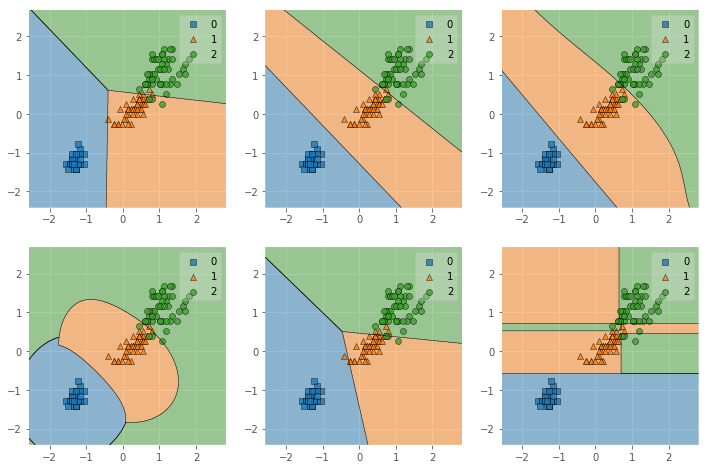

In [7]:
#分類結果を図示する
import matplotlib.pyplot as plt

# scikit-laernやmatplotlibに含まれない機能を含むPythonライブラリ
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

#配列データの結合（教師データ＋試験データ）
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 可視化
fig = plt.figure(figsize=(12,8))

for number, model in enumerate(models):
    
    # 表示するモデル数に合わせて、ここの変数を変更してあげる必要あり
    plt.subplot(2, 3, number+1)

    # model名の取得
    # <class 'sklearn.linear_model.logistic.LogisticRegression'>
    # -> LogisticRegression
    model_title = str(type(model)).split(".")[-1][:-2]#[:-len("Classifier")]
    print("model No." + str(number) + " : " + model_title)

    # 分類器の決定境界を引いてくれる神機能(mlxtendに含まれる機能の１つ)
    # データとターゲット，分類器を渡すだけで描いてくれる
    plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
plt.show()